In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!cd drive/MyDrive/Terminal34/; unzip football-dataset.zip

Archive:  football-dataset.zip
  inflating: About Acme AI.txt       
  inflating: COCO_Football Pixel.json  
  inflating: images/Frame 1  (1).jpg  
  inflating: images/Frame 1  (1).jpg___fuse.png  
  inflating: images/Frame 1  (1).jpg___save.png  
  inflating: images/Frame 1  (10).jpg  
  inflating: images/Frame 1  (10).jpg___fuse.png  
  inflating: images/Frame 1  (10).jpg___save.png  
  inflating: images/Frame 1  (100).jpg  
  inflating: images/Frame 1  (100).jpg___fuse.png  
  inflating: images/Frame 1  (100).jpg___save.png  
  inflating: images/Frame 1  (11).jpg  
  inflating: images/Frame 1  (11).jpg___fuse.png  
  inflating: images/Frame 1  (11).jpg___save.png  
  inflating: images/Frame 1  (12).jpg  
  inflating: images/Frame 1  (12).jpg___fuse.png  
  inflating: images/Frame 1  (12).jpg___save.png  
  inflating: images/Frame 1  (13).jpg  
  inflating: images/Frame 1  (13).jpg___fuse.png  
  inflating: images/Frame 1  (13).jpg___save.png  
  inflating: images/Frame 1  (14).jpg  

In [5]:
!ls drive/MyDrive/Terminal34/images

'Frame 1  (100).jpg'		 'Frame 1  (3).jpg___fuse.png'	 'Frame 1  (6).jpg___save.png'
'Frame 1  (100).jpg___fuse.png'  'Frame 1  (3).jpg___save.png'	 'Frame 1  (70).jpg'
'Frame 1  (100).jpg___save.png'  'Frame 1  (40).jpg'		 'Frame 1  (70).jpg___fuse.png'
'Frame 1  (10).jpg'		 'Frame 1  (40).jpg___fuse.png'  'Frame 1  (70).jpg___save.png'
'Frame 1  (10).jpg___fuse.png'	 'Frame 1  (40).jpg___save.png'  'Frame 1  (71).jpg'
'Frame 1  (10).jpg___save.png'	 'Frame 1  (41).jpg'		 'Frame 1  (71).jpg___fuse.png'
'Frame 1  (11).jpg'		 'Frame 1  (41).jpg___fuse.png'  'Frame 1  (71).jpg___save.png'
'Frame 1  (11).jpg___fuse.png'	 'Frame 1  (41).jpg___save.png'  'Frame 1  (72).jpg'
'Frame 1  (11).jpg___save.png'	 'Frame 1  (42).jpg'		 'Frame 1  (72).jpg___fuse.png'
'Frame 1  (12).jpg'		 'Frame 1  (42).jpg___fuse.png'  'Frame 1  (72).jpg___save.png'
'Frame 1  (12).jpg___fuse.png'	 'Frame 1  (42).jpg___save.png'  'Frame 1  (73).jpg'
'Frame 1  (12).jpg___save.png'	 'Frame 1  (43).jpg'		 'Frame 1  (73).

In [4]:
import os
import keras
import numpy as np
import pandas as pd
import tensorflow as tf

from glob import glob
from tqdm import tqdm
import tensorflow.image as tfi
from tensorflow.keras.utils import load_img, img_to_array

import matplotlib.pyplot as plt

from keras.layers import add
from keras.layers import Input
from keras.layers import Layer
from keras.layers import Conv2D
from keras.layers import multiply
from keras.layers import Dropout
from keras.layers import MaxPool2D
from keras.layers import Concatenate
from keras.layers import Conv2DTranspose
from keras.layers import BatchNormalization
from keras.callbacks import Callback, ModelCheckpoint
from keras.models import Model

from tensorflow.keras.utils import plot_model

In [6]:
# Root Path
image_paths = 'drive/MyDrive/Terminal34/images'

# All Images and thier respective maps
all_images = glob(os.path.join(image_paths, "*.jpg"))
all_paths = [path.replace(".jpg", ".jpg___fuse.png") for path in all_images]

In [7]:
all_paths

['drive/MyDrive/Terminal34/images/Frame 1  (1).jpg___fuse.png',
 'drive/MyDrive/Terminal34/images/Frame 1  (10).jpg___fuse.png',
 'drive/MyDrive/Terminal34/images/Frame 1  (100).jpg___fuse.png',
 'drive/MyDrive/Terminal34/images/Frame 1  (11).jpg___fuse.png',
 'drive/MyDrive/Terminal34/images/Frame 1  (12).jpg___fuse.png',
 'drive/MyDrive/Terminal34/images/Frame 1  (13).jpg___fuse.png',
 'drive/MyDrive/Terminal34/images/Frame 1  (14).jpg___fuse.png',
 'drive/MyDrive/Terminal34/images/Frame 1  (15).jpg___fuse.png',
 'drive/MyDrive/Terminal34/images/Frame 1  (16).jpg___fuse.png',
 'drive/MyDrive/Terminal34/images/Frame 1  (17).jpg___fuse.png',
 'drive/MyDrive/Terminal34/images/Frame 1  (18).jpg___fuse.png',
 'drive/MyDrive/Terminal34/images/Frame 1  (19).jpg___fuse.png',
 'drive/MyDrive/Terminal34/images/Frame 1  (2).jpg___fuse.png',
 'drive/MyDrive/Terminal34/images/Frame 1  (20).jpg___fuse.png',
 'drive/MyDrive/Terminal34/images/Frame 1  (21).jpg___fuse.png',
 'drive/MyDrive/Terminal34

In [8]:
def load_image(path, SIZE=256):
    image = load_img(path)
    image = tfi.resize(image, (SIZE, SIZE))
    image = img_to_array(image)
    image = tf.cast(image, tf.float32)
    image = image/255.
    return image

def load_data(image_paths, label_paths, SIZE=256):
    images, label_maps = np.zeros(
        shape=(len(image_paths), SIZE, SIZE, 3)), np.zeros(shape=(len(label_paths), SIZE, SIZE, 3))
    for i, (image_path, label_path) in tqdm(
        enumerate(zip(image_paths, label_paths)), desc="Loading"):
        image, label_map = load_image(image_path, SIZE=SIZE), load_image(label_path, SIZE=SIZE)
        images[i], label_maps[i] = image, label_map
    return images, label_maps

In [9]:
images, label_maps = load_data(all_images, all_paths)

Loading: 100it [00:08, 11.90it/s]


In [10]:
def show_map(image, label_map, alpha_1=1, alpha_2=0.7):
    plt.imshow(image, alpha=alpha_1)
    plt.imshow(label_map, alpha=alpha_2)
    plt.axis('off')

In [11]:
def show_maps(images, label_maps, GRID=[5,6], SIZE=(25,25)):

    # Plot Configuration
    n_rows, n_cols = GRID
    n_images = n_rows * n_cols
    plt.figure(figsize=SIZE)

    # Iterate through the Data
    i=1
    for image, label_map in zip(images, label_maps):

        # Plot Image
        plt.subplot(n_rows, n_cols, i)
        show_map(image, label_map)

        i+=1
        if i>n_images:
            break

    # Final Plot
    plt.show()

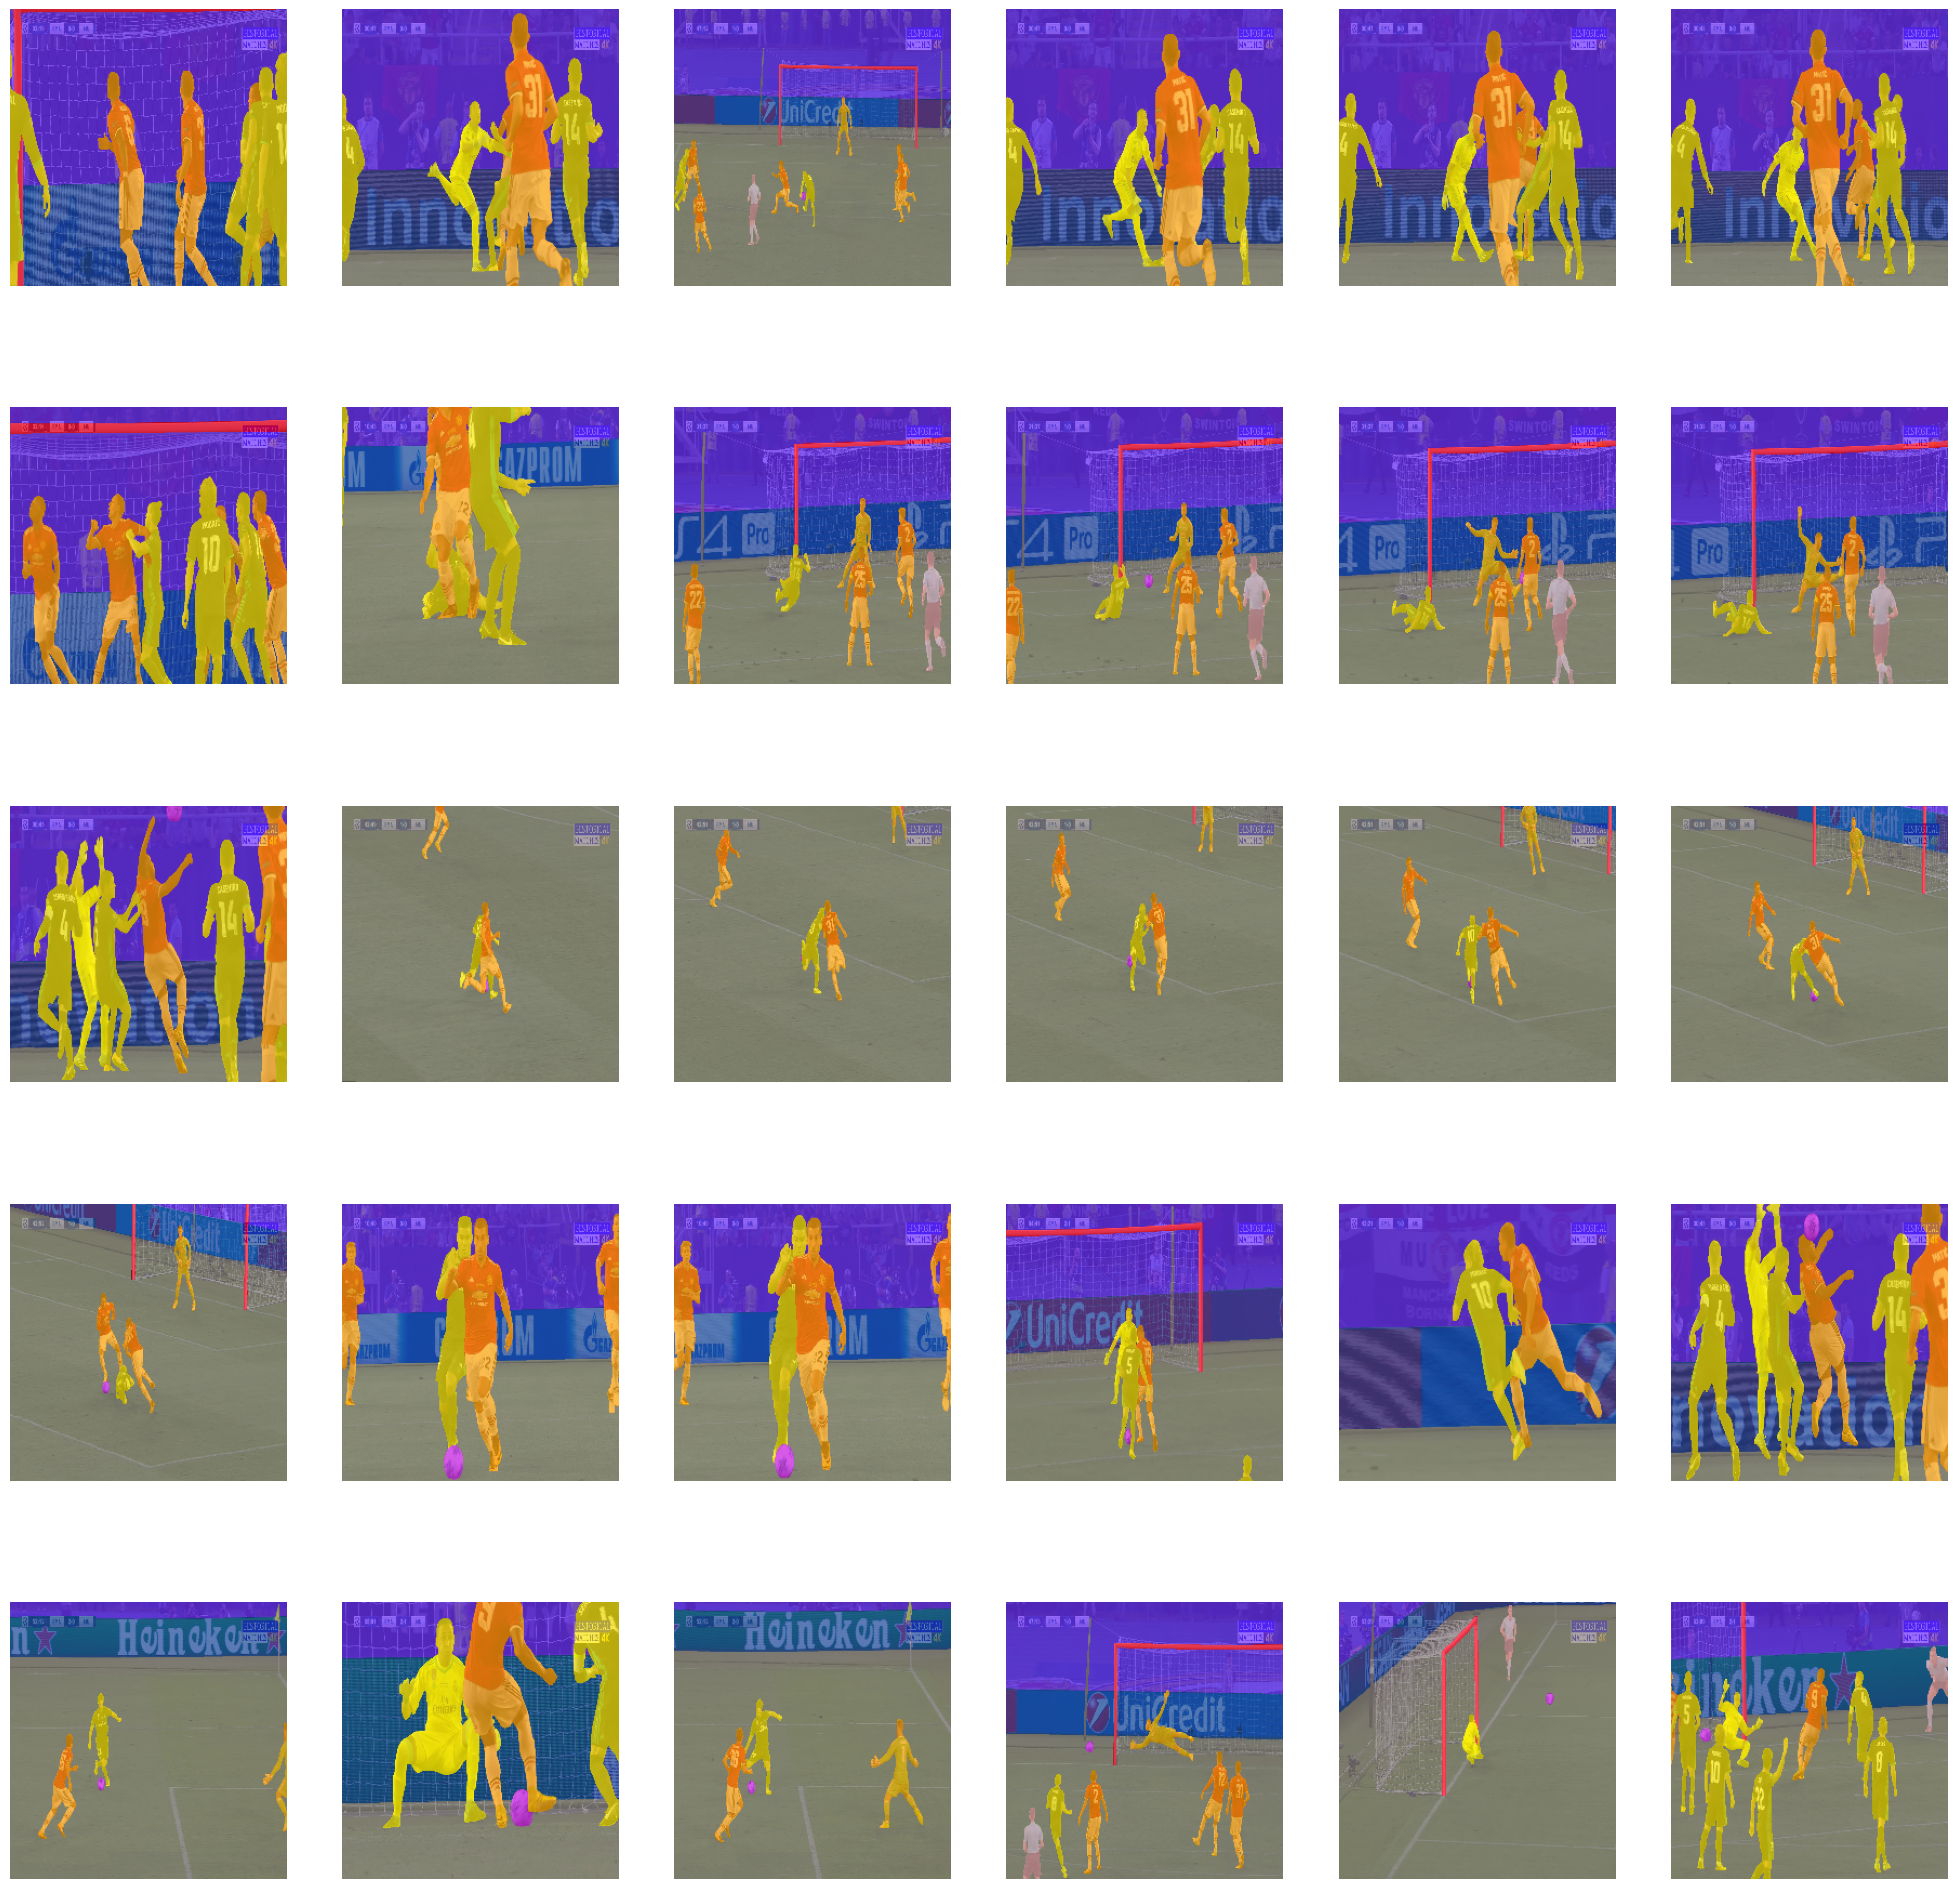

In [12]:
show_maps(images, label_maps)